In [ ]:
import os
job_cancel_str="scancel " + os.environ['SLURM_JOBID']
os.system(job_cancel_str)

# Imports

In [1]:
# from os import chdir, scandir, makedirs
import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec
import seaborn as sns


from tqdm.notebook import tqdm
from glob import glob

import os

# from itertools import cycle
# from multiprocessing import Pool, cpu_count

import pandas as pd
import numpy as np
import json

In [26]:
res_pths = glob('/sise/assafzar-group/g-and-n/tabular_models_results/421*/*/r*.csv')
dfs = [pd.read_csv(pth, dtype={'Plate':str}) for pth in res_pths]
len(dfs)

12

In [34]:
res_idxs = [int(pth.split('/')[-3][-2:])-1 for pth in res_pths]
res_idxs

[8, 2, 1, 0, 4, 3, 5, 6, 10, 9, 11, 7]

In [36]:
channels_inout = [
    (['AGP'], ['DNA', 'Mito']),
    (['AGP'], ['DNA', 'RNA']),
    (['AGP'], ['ER', 'Mito']),
    (['AGP'], ['ER', 'RNA']),
    (['DNA'], ['AGP', 'Mito']),
    (['DNA'], ['AGP', 'RNA']),
    (['ER'], ['AGP', 'Mito']),
    (['ER'], ['AGP', 'RNA']),
    (['Mito'], ['AGP', 'DNA']),
    (['Mito'], ['AGP', 'ER']),
    (['RNA'], ['AGP', 'DNA']),
    (['RNA'], ['AGP', 'ER']),
]

In [25]:
dfs[0]

,Dataset,Plate,Subset,MSE,PCC
0,train,NaN,NaN,0.397029,0.676350
1,val,NaN,NaN,0.429828,0.662797
2,test,24596,mock,0.389991,0.681201
3,test,24596,treated,0.341891,0.713606
4,test,26679,mock,0.337332,0.688233
...,...,...,...,...,...
197,test,24666,treated,0.402519,0.653998
198,test,24652,mock,0.336923,0.697023
199,test,24652,treated,0.361754,0.677561
200,test,25858,mock,0.792019,0.584210


In [10]:
res = df.groupby('Dataset').mean().reset_index()
res

,Dataset,MSE,PCC
0,test,0.346925,0.720858
1,train,0.373386,0.716282
2,val,0.346787,0.732951


<AxesSubplot:xlabel='Dataset', ylabel='MSE'>

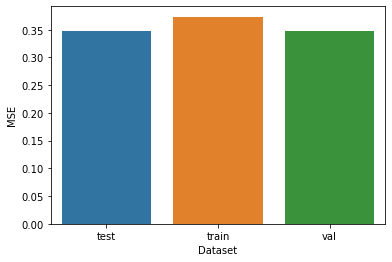

In [12]:
sns.barplot(data=res, x='Dataset', y='MSE')

<AxesSubplot:xlabel='Dataset', ylabel='PCC'>

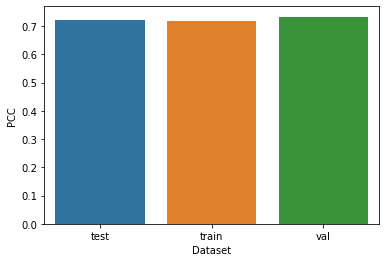

In [13]:
sns.barplot(data=res, x='Dataset', y='PCC')

In [60]:
metrics = dfs[0].columns[3:]
list(metrics)

['MSE', 'PCC']

# Plot Metrics Distribution

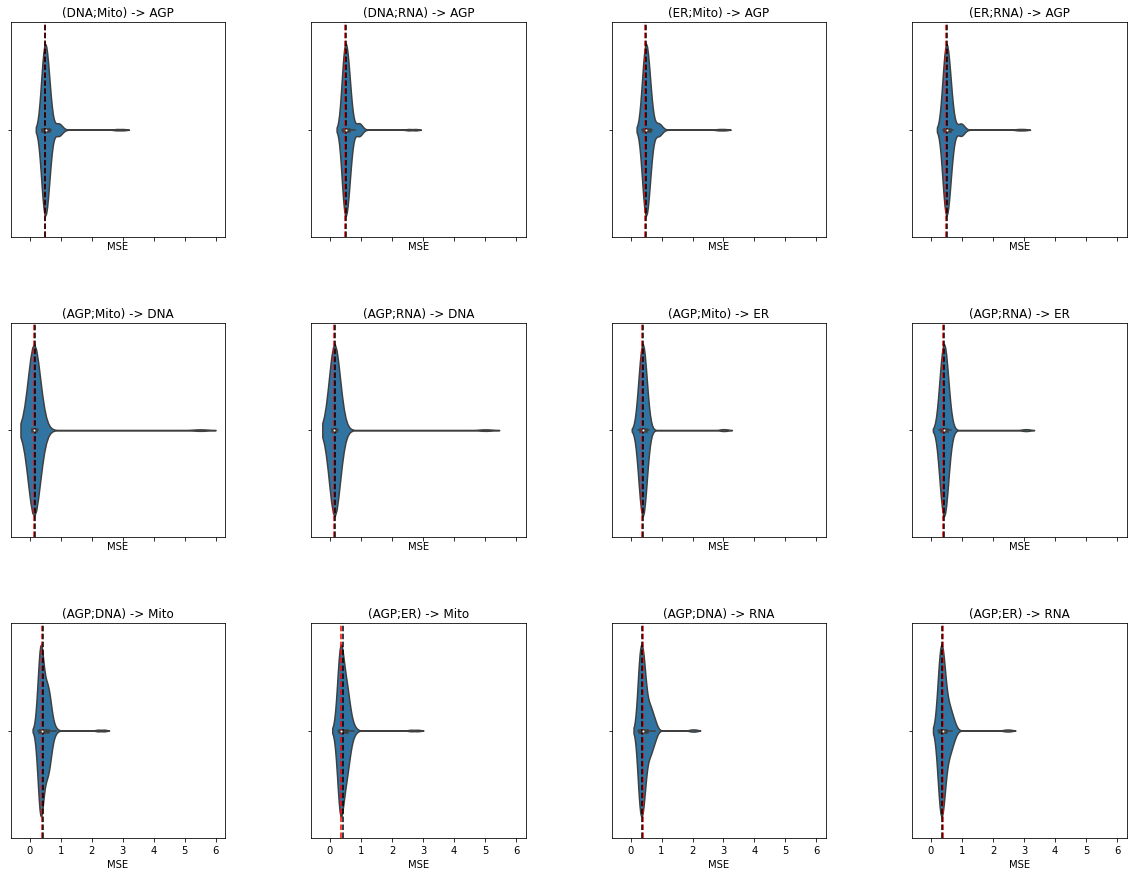

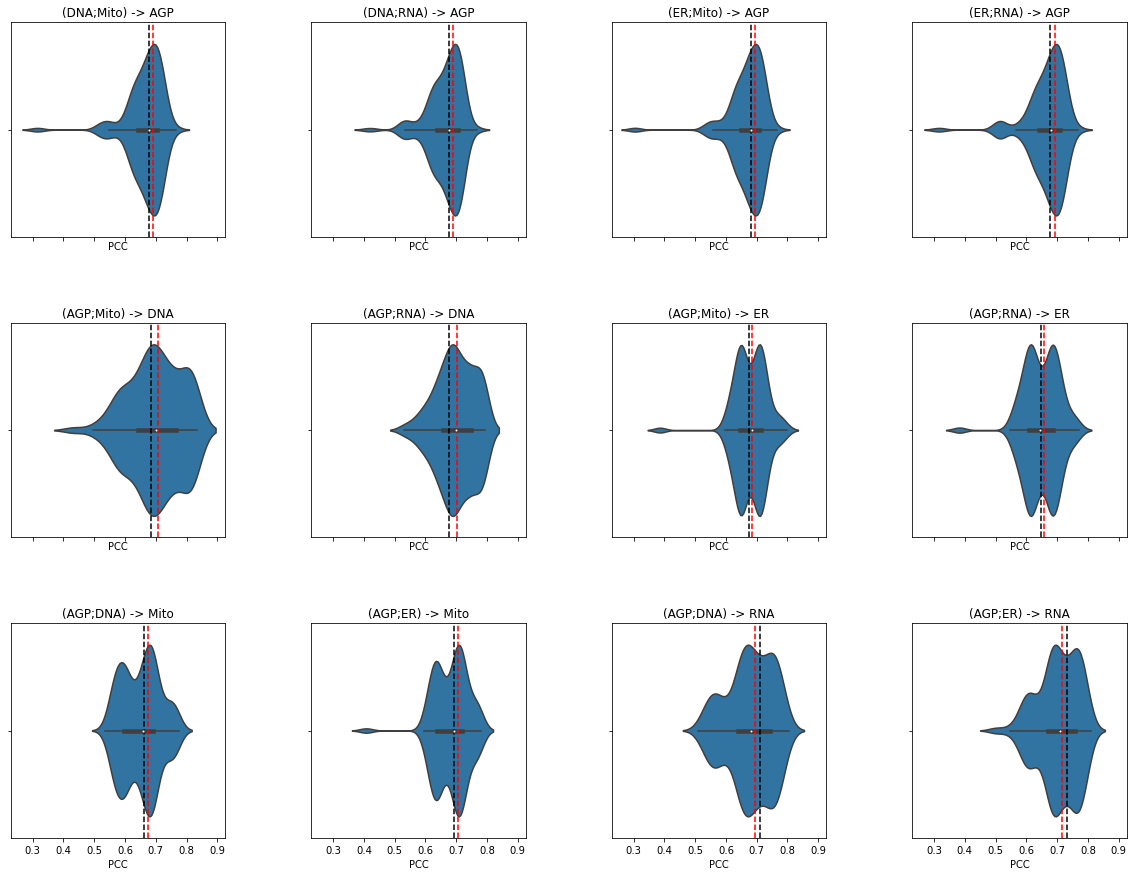

In [59]:
ncol = 4
nrow = len(dfs)//ncol

for metric in metrics:
    # d={'xlabel':"features Z-score", 'ylabel':"mapping Z-score"}
    d = {}
    fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True, sharex=True, subplot_kw=d)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    # fig.suptitle(f'Comapring Z-score - raw features vs. mappings', fontsize = 24)

    for i, df in zip(res_idxs, dfs):
        ax = axs[i//ncol,i%ncol]
        ax = sns.violinplot(x=df[df['Dataset'] == 'test'][metric], ax=ax)
        ax.axvline(df.iloc[0][metric], color='r', linestyle='--')
        ax.axvline(df.iloc[1][metric], color='k', linestyle='--')
    #     ax.set_yscale('symlog', base=10)
    #     ax.set_xscale('symlog', base=10)
    #     ax.set(xlim=(0, 40), ylim=(0, 40))

        out_chans, in_chans = channels_inout[i]

        ax.set_title(f'({";".join(in_chans)}) -> {out_chans[0]}')
    #     ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
    #                      bottom=True, top=False, left=True, right=False)

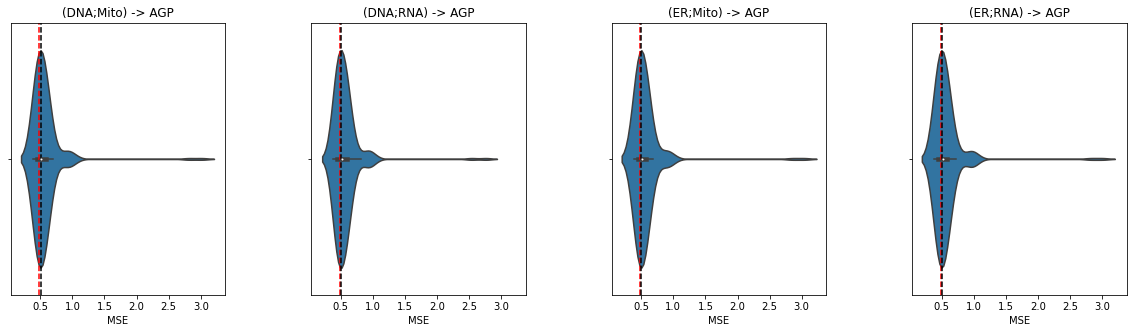

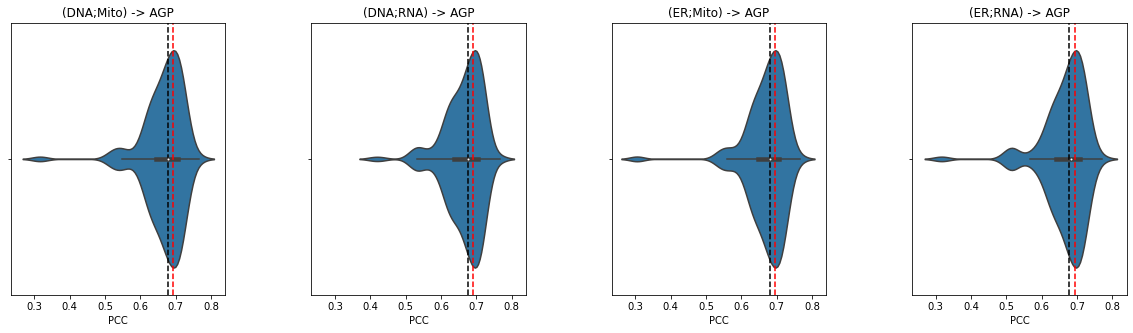

In [58]:
ncol = 4
nrow = 1

for metric in metrics:
    # d={'xlabel':"features Z-score", 'ylabel':"mapping Z-score"}
    d = {}
    fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True, sharex=True, subplot_kw=d)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)
    # fig.suptitle(f'Comapring Z-score - raw features vs. mappings', fontsize = 24)

    for i, df in zip(res_idxs, dfs):
        if i >= 4:
            continue
        ax = axs[i%ncol]
        ax = sns.violinplot(x=df[df['Dataset'] == 'test'][metric], ax=ax)
        ax.axvline(df.iloc[0][metric], color='r', linestyle='--')
        ax.axvline(df.iloc[1][metric], color='k', linestyle='--')
    #     ax.set_yscale('symlog', base=10)
    #     ax.set_xscale('symlog', base=10)
    #     ax.set(xlim=(0, 40), ylim=(0, 40))

        out_chans, in_chans = channels_inout[i]

        ax.set_title(f'({";".join(in_chans)}) -> {out_chans[0]}')
    #     ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
    #                      bottom=True, top=False, left=True, right=False)

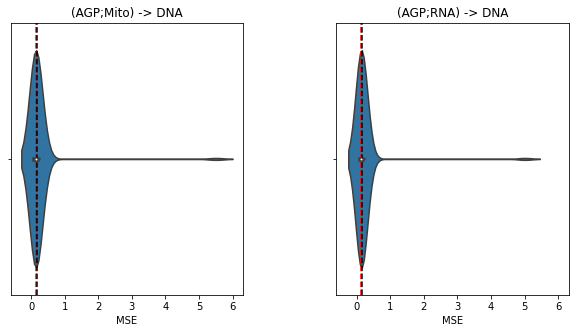

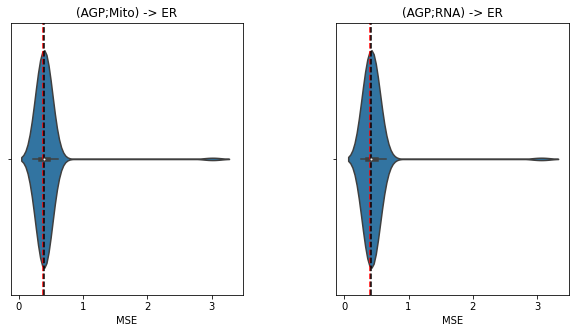

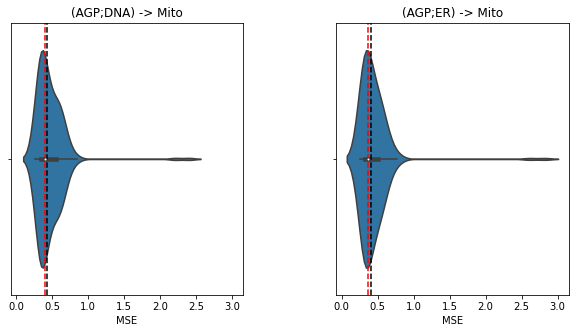

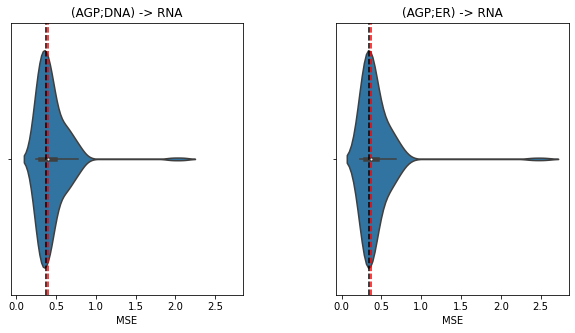

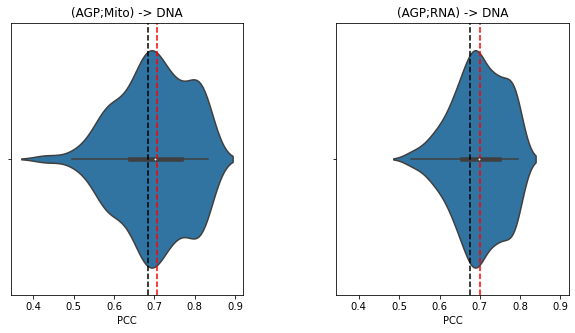

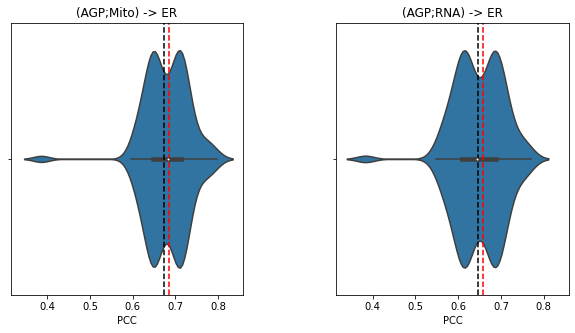

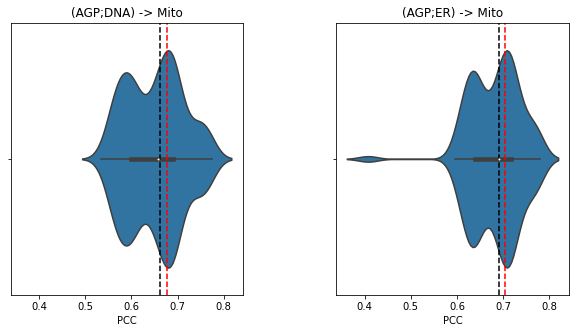

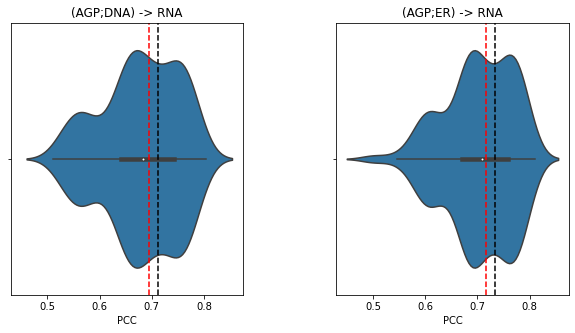

In [57]:
ncol = 2
nrow = 1

for metric in metrics:
    for j in range(0, 7, 2):
        # d={'xlabel':"features Z-score", 'ylabel':"mapping Z-score"}
        d = {}
        fig, axs = plt.subplots(nrows=nrow, ncols=ncol, figsize=(ncol*5,nrow*5), sharey=True, sharex=True, subplot_kw=d)
        fig.subplots_adjust(hspace=0.4, wspace=0.4)
        # fig.suptitle(f'Comapring Z-score - raw features vs. mappings', fontsize = 24)

        for i, df in zip(res_idxs, dfs):
            if i < 4+j or i >= 6+j:
                continue
            ax = axs[i%ncol]
            ax = sns.violinplot(x=df[df['Dataset'] == 'test'][metric], ax=ax)
            ax.axvline(df.iloc[0][metric], color='r', linestyle='--')
            ax.axvline(df.iloc[1][metric], color='k', linestyle='--')
        #     ax.set_yscale('symlog', base=10)
        #     ax.set_xscale('symlog', base=10)
        #     ax.set(xlim=(0, 40), ylim=(0, 40))

            out_chans, in_chans = channels_inout[i]

            ax.set_title(f'({";".join(in_chans)}) -> {out_chans[0]}')
        #     ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
        #                      bottom=True, top=False, left=True, right=False)

# Plot Bar Plot

In [107]:
[res_idxs[res_idxs.index(idx)] for idx in range(len(res_idxs))]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [102]:
dfs_copy = [dfs[res_idxs.index(idx)].copy() for idx in range(len(res_idxs))]

In [103]:
for i, df in enumerate(dfs_copy):
    out_chans, in_chans = channels_inout[i]
    df['Model'] = f'({";".join(in_chans)}) -> {out_chans[0]}'

In [128]:
all_dfs = pd.concat(dfs_copy)
all_dfs['Dataset'] = all_dfs['Dataset'].apply(lambda x: x+'-' if x=='test' else x) + all_dfs['Subset'].apply(lambda x: '' if x is np.nan else x)

In [129]:
agg_melt = all_dfs.melt(id_vars=['Model', 'Dataset'], value_vars=metrics, var_name='Metric_Name', value_name='Metric_Value')

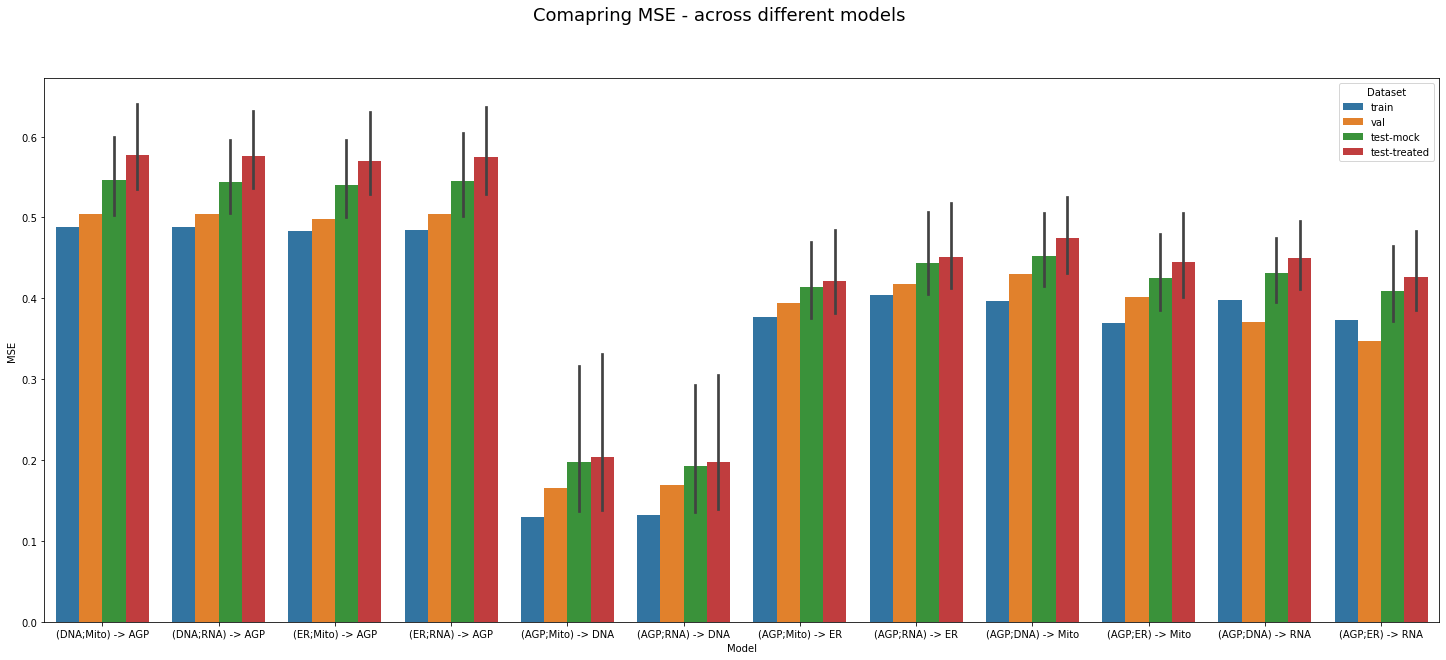

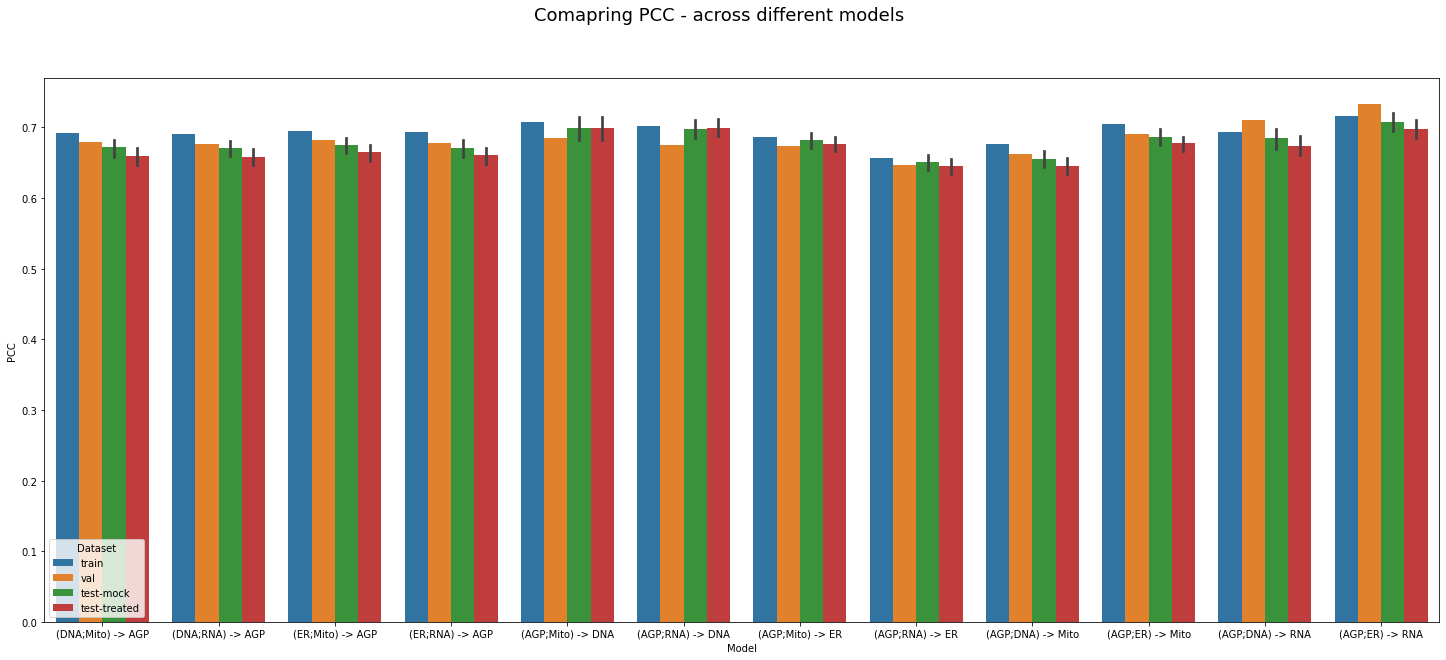

In [133]:
for metric in metrics:
    fig, axs = plt.subplots(figsize=(25,10), facecolor='white')
    fig.suptitle(f'Comapring {metric} - across different models', fontsize = 18)
    _ = sns.barplot(data=agg_melt[agg_melt['Metric_Name']==metric], x='Model', y='Metric_Value', hue='Dataset', ax=axs)
    _ = axs.set_ylabel(metric)